In [159]:
# import the MongoClient class
from pymongo import MongoClient
import pymongo

# import the Pandas library
import pandas as pd

# import the NumPy library as an alias
import numpy as np
import creds


# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


#
import datetime
import re

In [ ]:
currtime=datetime.datetime.now()

Taken from
https://alysivji.github.io/importing-mongo-documents-into-pandas-dataframes.html

In [48]:
client = MongoClient("mongodb://storage:27017/", username='judyread', password=creds.judyro,authSource='admin', authMechanism='SCRAM-SHA-1')

In [49]:
db = client["judy"]

In [50]:
col = db.exps

In [68]:
response=col.find().sort('$natural', pymongo.DESCENDING).limit(50)

In [67]:
list(response)

[{'_id': ObjectId('5d4eb1c1855a2849a93254f0'),
  'current_dex': '40',
  'maxhps': '212889',
  'gold': '5324229',
  'regeneration_on': '1',
  'infravision_on': '1',
  'current_wis': '183',
  'sanctuary_on': '1',
  'name': 'Ida',
  'kickbonus': '3',
  'maxmana': '10075',
  'mainmob': 'tree2',
  'strength_on': '1',
  'current_con': '79',
  'senselife_on': '1',
  'kick_multiplier': '10',
  'current_int': '52',
  'current_str': '45',
  'kick_timer': '3',
  'armor_on': '1',
  'clarity_on': '1',
  'bank': '4000000',
  'currentmana': '10075',
  'room': '6105',
  'experience': '632681633',
  'maxmoves': '543',
  'time': '1565438045',
  'harm_multiplier': '15',
  'currenthps': '212889'},
 {'_id': ObjectId('5d4eb1c1855a2849a93254ef'),
  'current_dex': '40',
  'maxhps': '155361',
  'gold': '23307394',
  'regeneration_on': '1',
  'infravision_on': '1',
  'current_wis': '201',
  'sanctuary_on': '1',
  'name': 'Clem',
  'kickbonus': '3',
  'maxmana': '10048',
  'mainmob': 'tree4',
  'strength_on': '1

In [41]:
client.close()

In [72]:
#for r in response:
#    print(r)

In [69]:
df =  pd.DataFrame(list(response))

In [73]:
df.head()

,_id,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,...,maxhps,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time
0,5d4eb1c1855a2849a93254f0,1,4000000,1,79,40,52,45,183,212889,...,212889,10075,543,Ida,1,6105,1,1,1,1565438045
1,5d4eb1c1855a2849a93254ef,1,0,1,40,40,52,45,201,155361,...,155361,10048,670,Clem,1,6123,1,1,1,1565438049
2,5d4eb1c1855a2849a93254ee,1,45,1,1,169,176,40,40,172432,...,172432,10009,565,Quinton,1,6105,1,1,1,1565438045
3,5d4eb1c1855a2849a93254ed,1,0,1,40,40,40,45,213,221582,...,221582,10395,654,Bert,1,6105,1,1,1,1565438049
4,5d4eb1c1855a2849a93254ec,1,0,1,60,40,45,44,117,111038,...,111038,10024,652,Lee,1,6109,1,1,1,1565438049


In [83]:
df['name'][0]

'Ida'

In [85]:
df.loc[df['name'] == 'Ida']

,_id,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,...,maxhps,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time
0,5d4eb1c1855a2849a93254f0,1,4000000,1,79,40,52,45,183,212889,...,212889,10075,543,Ida,1,6105,1,1,1,1565438045
45,5d4eae3d855a28480d4359b1,1,4000000,1,79,40,52,45,183,212889,...,212889,10075,543,Ida,1,6105,1,1,1,1565437445
46,5d4eae3d855a28480d4359b0,1,4000000,1,79,40,52,45,183,212889,...,212889,10075,543,Ida,1,6105,1,1,1,1565436845


In [90]:
type(df.time[0])

str

In [93]:
df['dateStamp'] = pd.to_datetime(df['time'], unit='s')

In [94]:
type(df.dateStamp[0])

pandas._libs.tslibs.timestamps.Timestamp

_id
armor_on
bank
clarity_on
current_con
current_dex
current_int
current_str
current_wis
currenthps
currentmana
experience
gold
harm_multiplier
infravision_on
kick_multiplier
kick_timer
kickbonus
mainmob
maxhps
maxmana
maxmoves
name
regeneration_on
room
sanctuary_on
senselife_on
strength_on
time
dateStamp


In [101]:
mystrs=[]
myints=[]


In [100]:
type(df['currenthps'][0])

str

In [103]:
df.head(2)

,_id,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,...,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time,dateStamp
0,5d4eb1c1855a2849a93254f0,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565438045,2019-08-10 11:54:05
1,5d4eb1c1855a2849a93254ef,1,0,1,40,40,52,45,201,155361,...,10048,670,Clem,1,6123,1,1,1,1565438049,2019-08-10 11:54:09


#### how to fix the NaNs. 

In [121]:
# find nans
df10 = df[df.isna().any(axis=1)]

In [126]:
for c in df.columns: 
    print(df10[c])

2     5d4eb1c1855a2849a93254ee
21    5d4eb1c1855a2849a93254db
23    5d4eb1c1855a2849a93254d9
31    5d4eb1c1855a2849a93254d1
42    5d4eb1c1855a2849a93254c6
49    5d4eae3d855a28480d4359ad
Name: _id, dtype: object
2     1
21    1
23    1
31    3
42    1
49    1
Name: armor_on, dtype: int64
2          45
21         45
23         45
31    4000000
42         44
49         45
Name: bank, dtype: int64
2      1
21     1
23     1
31    10
42     1
49     1
Name: clarity_on, dtype: int64
2      1
21     1
23     1
31    61
42     1
49     1
Name: current_con, dtype: int64
2     169
21     40
23     40
31     40
42     77
49    169
Name: current_dex, dtype: int64
2     176
21    203
23    213
31     40
42    158
49    176
Name: current_int, dtype: int64
2     40
21    40
23    40
31    40
42    40
49    40
Name: current_str, dtype: int64
2      40
21     40
23     40
31    225
42     62
49     40
Name: current_wis, dtype: int64
2     172432
21    213825
23    160063
31    204839
42    103240
49   

In [146]:
df['harm_multiplier'].dropna().mode()

0    15
dtype: object

In [142]:
np.mean(df10['harm_multiplier'].dropna())

nan

In [171]:
# here we're trying to fix NaNs by replacing them with the mean or the mode of other numbers in the column series
# this method is currently borked
for c in df10.columns: 
    print(c)
    for x in range(1,50):
        if 'id' not in c and df10[c][x] and pd.isnull(df10[c][x]):
            nonce = round(np.mode(df10[c].dropna()))
            print(c, nonce)

_id
armor_on


KeyError: 1

In [ ]:
fixtype(col):
    foo = str(df[col][0])
    if foo.isnumeric():
        df[col] = df[col].astype(int)

In [196]:
df['name'][0].is

False

In [204]:
set(df['harm_multiplier'].dropna())

{'15'}

In [205]:
df['harm_multiplier'].dropna().mode()

0    15
dtype: object

In [ ]:
for c in df.columns:
    if 

In [198]:
for c in df.columns:
    print(c)
    foo = str(df[c][0])
    if foo.isnumeric():
        df[c] = df[c].astype(int)
    elif foo.isalpha():
        df[c] = df[c].astype(str)
    else:
        print(type(df[c][0]))

_id
<class 'bson.objectid.ObjectId'>
armor_on
bank
clarity_on
current_con
current_dex
current_int
current_str
current_wis
currenthps
currentmana
experience
gold
harm_multiplier


ValueError: cannot convert float NaN to integer

In [124]:
df['maxmoves']

0     543
1     670
2     565
3     654
4     652
5     727
6     527
7     582
8     642
9     672
10    554
11    738
12    549
13    509
14    613
15    611
16    543
17    526
18    632
19    550
20    546
21    552
22    539
23    608
24    582
25    662
26    536
27    526
28    660
29    565
30    551
31    571
32    674
33    546
34    574
35    676
36    552
37    550
38    547
39    519
40    537
41    534
42    611
43    540
44    546
45    543
46    543
47    670
48    670
49    565
Name: maxmoves, dtype: object

In [130]:
df10[c][2]

Timestamp('2019-08-10 11:54:05')

In [157]:
df.loc[df['name'] == 'Ida']['currenthps']

0     212889
45    212889
46    212889
Name: currenthps, dtype: int64

In [165]:
df.loc[df['name'] == 'Ida']

,_id,armor_on,bank,clarity_on,current_con,current_dex,current_int,current_str,current_wis,currenthps,...,maxmana,maxmoves,name,regeneration_on,room,sanctuary_on,senselife_on,strength_on,time,dateStamp
0,5d4eb1c1855a2849a93254f0,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565438045,2019-08-10 11:54:05
45,5d4eae3d855a28480d4359b1,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565437445,2019-08-10 11:44:05
46,5d4eae3d855a28480d4359b0,1,4000000,1,79,40,52,45,183,212889,...,10075,543,Ida,1,6105,1,1,1,1565436845,2019-08-10 11:34:05


In [167]:
df['name'].value_counts().head(10)

Ida        3
Clem       3
Quinton    2
Desmond    1
Linda      1
Fanny      1
Paul       1
Bruce      1
Titas      1
Maud       1
Name: name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

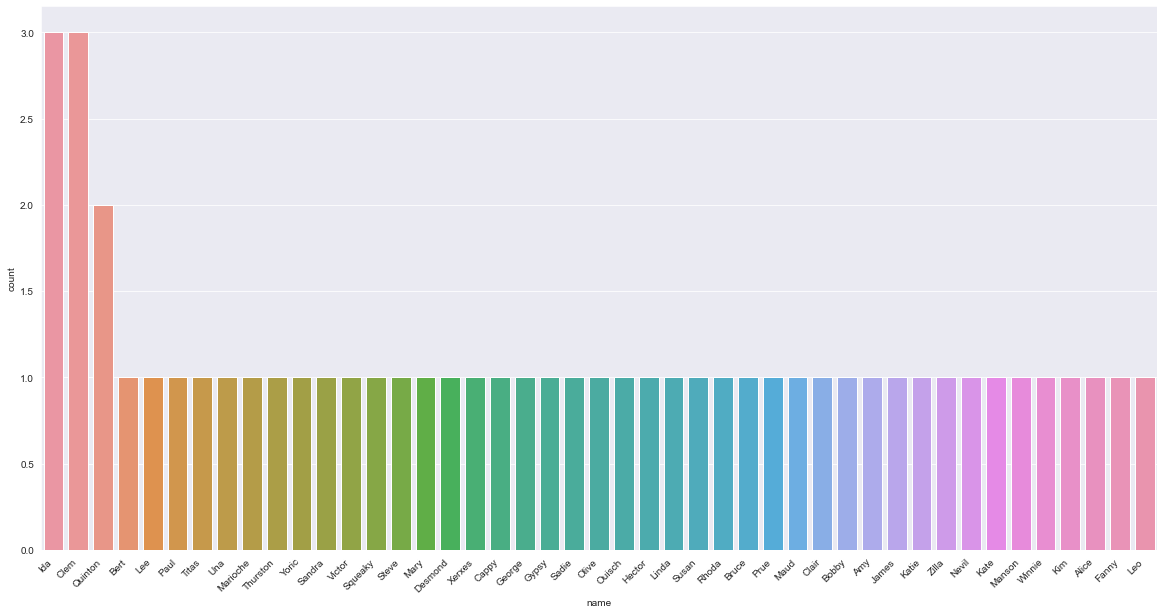

In [163]:
plt.figure(figsize=(20,10))
sns.countplot(df['name'])
plt.xticks(rotation=45, ha='right')

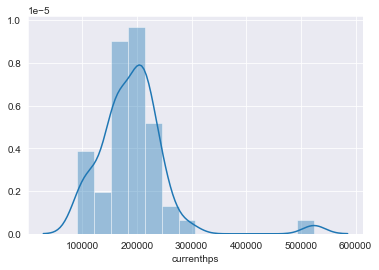

In [170]:
#What's the distribution of hit points for this sample?
sns.distplot(df['currenthps'])

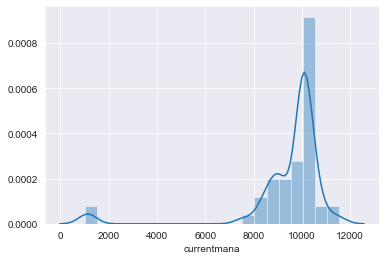

In [172]:
sns.distplot(df['currentmana'])

ValueError: cannot reindex from a duplicate axis

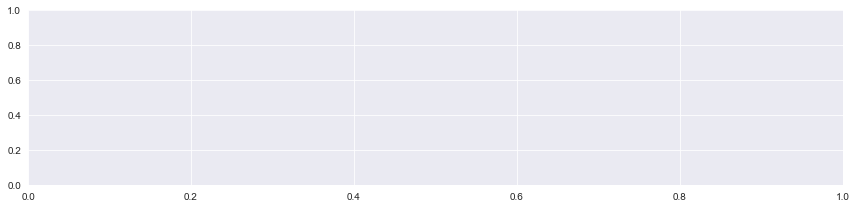

In [193]:
# Not working
# Visualizing Age with FacetGrid and kdeplot using multiple subplots
fig = sns.FacetGrid(df['currenthps'],hue=df['name'],aspect=4)
fig.map(sns.kdeplot,'currenthps',shade=True) # add the kdeplot
oldest = df['currenthps'].max() # what should the upper limit of the x axis be?
fig.set(xlim=(0,oldest)) # set the xlimits from non-negative numbers to oldest
fig.add_legend() # add a legend

TypeError: can't multiply sequence by non-int of type 'float'

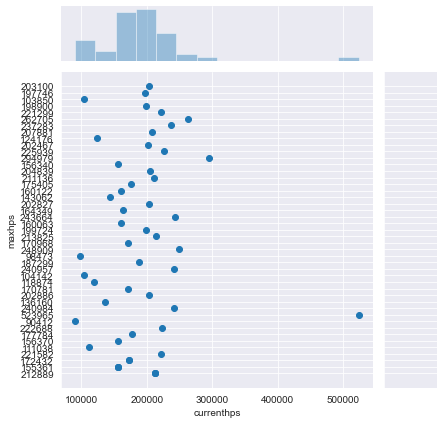

In [177]:
sns.jointplot('currenthps','maxhps',data=df)
plt.xticks(rotation=45, ha='right')

In [178]:
df['currenthps'].mean()

191769.14

In [179]:
df['maxhps'].mean()

4.257783107223448e+295

In [182]:
df.columns

Index(['_id', 'armor_on', 'bank', 'clarity_on', 'current_con', 'current_dex',
       'current_int', 'current_str', 'current_wis', 'currenthps',
       'currentmana', 'experience', 'gold', 'harm_multiplier',
       'infravision_on', 'kick_multiplier', 'kick_timer', 'kickbonus',
       'mainmob', 'maxhps', 'maxmana', 'maxmoves', 'name', 'regeneration_on',
       'room', 'sanctuary_on', 'senselife_on', 'strength_on', 'time',
       'dateStamp'],
      dtype='object')

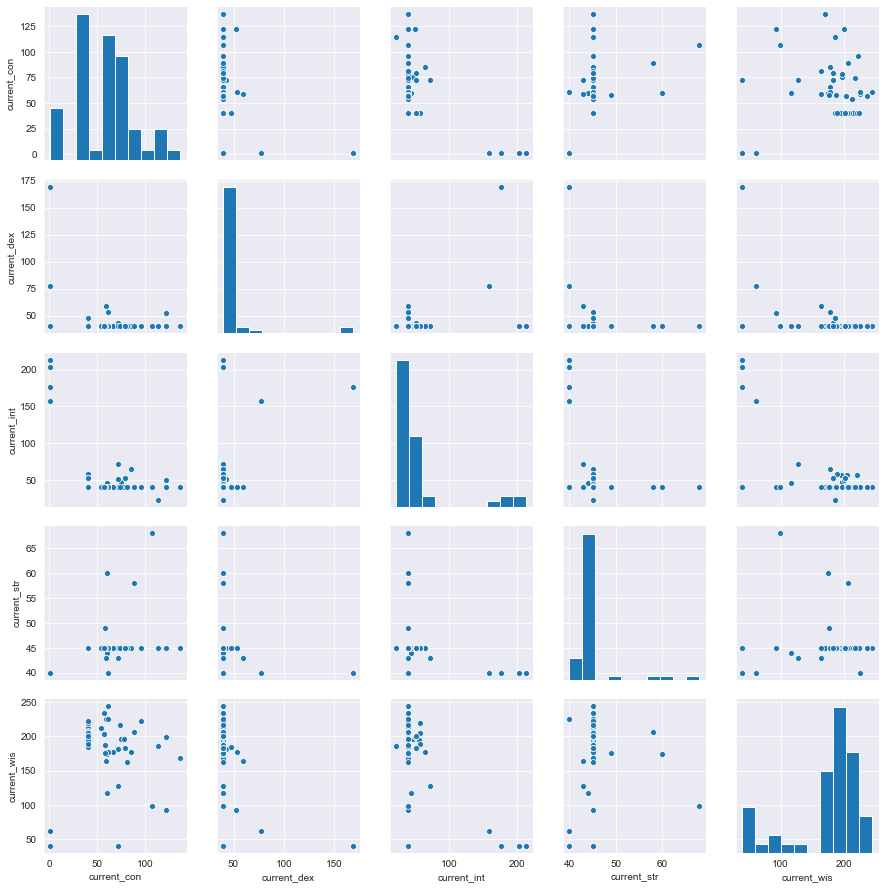

In [183]:
sns.pairplot(df[['current_con','current_dex','current_int','current_str','current_wis']])

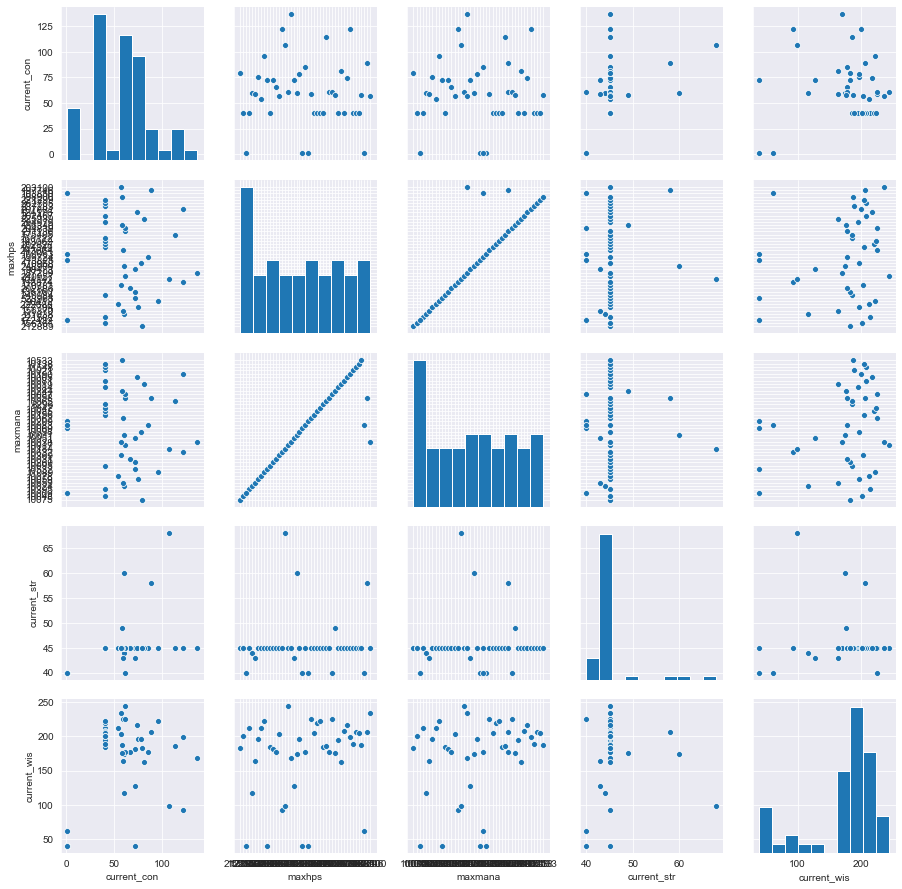

In [184]:
sns.pairplot(df[['current_con','maxhps','maxmana','current_str','current_wis']])

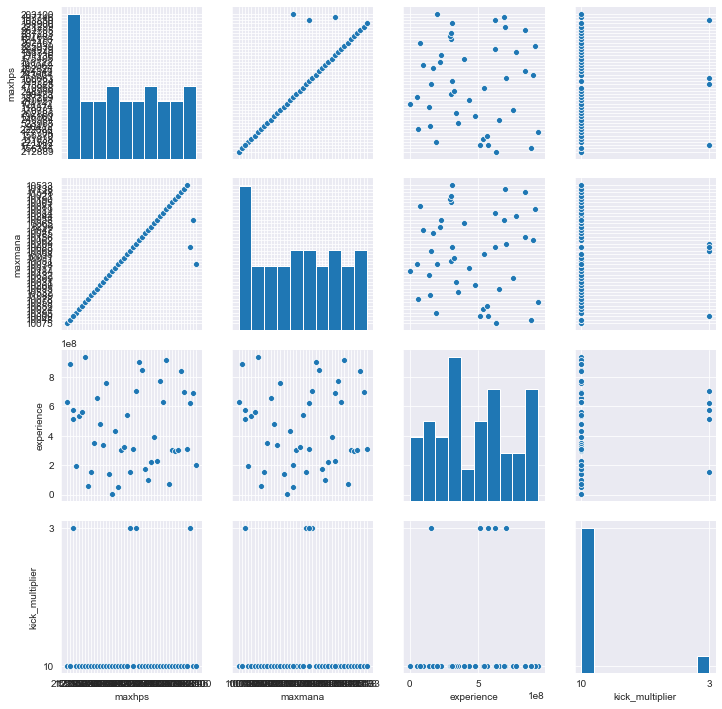

In [188]:
sns.pairplot(df[['maxhps','maxmana','experience','kick_multiplier']].dropna())

In [194]:
df.dtypes

_id                        object
armor_on                    int64
bank                        int64
clarity_on                  int64
current_con                 int64
current_dex                 int64
current_int                 int64
current_str                 int64
current_wis                 int64
currenthps                  int64
currentmana                 int64
experience                  int64
gold                        int64
harm_multiplier            object
infravision_on             object
kick_multiplier            object
kick_timer                 object
kickbonus                  object
mainmob                    object
maxhps                     object
maxmana                    object
maxmoves                   object
name                       object
regeneration_on            object
room                       object
sanctuary_on               object
senselife_on               object
strength_on                object
time                       object
dateStamp     